# Carregamento dos dados

In [317]:
import pandas as pd

# Carregando os dados do arquivo CSV pré-processado em um DataFrame do pandas
comentarios = pd.read_csv('../Data/content_pre_processado.csv')

# Exibindo as primeiras 5 linhas do DataFrame para verificação
comentarios.head(5)

,reviewId,app_name,content,sentiment_polarity,sentiment
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,sopre razoável apesar fácil utilizar apresenta...,positive,sadness
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,otimizar fácil visualizar produto pedido rastr...,positive,sadness
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,prático fácil entender vendedor mandar produto...,positive,sadness
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo chatear fato pesquisar produto colo...,positive,sadness
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,ter dificuldade pagamento cartão crédito compr...,negative,disgust


# Extração da features (representação de texto em formato vetorial)

<p style="color:green">A seguir, faremos a instanciação do método que fará a representação do texto usando o modelo TF-IDF.</p> 

In [318]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Criando uma instância do TfidfVectorizer
# O TfidfVectorizer converte uma coleção de documentos de texto em uma matriz de características TF-IDF
# TF-IDF é uma técnica que avalia a importância de uma palavra em um documento em relação a um corpus de documentos
tfidf_vectorizer = TfidfVectorizer()

In [319]:
# Transformando o texto da coluna 'content' em uma matriz TF-IDF
# fit_transform: Ajusta o modelo aos dados de texto e transforma os dados em uma matriz esparsa de características TF-IDF
# tfidf_matrix: Matriz onde cada linha representa um documento e cada coluna representa uma palavra, com valores TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(comentarios['content'])

In [320]:
# Convertendo a matriz TF-IDF em um DataFrame do pandas
# tfidf_matrix.toarray(): Converte a matriz esparsa TF-IDF em uma matriz densa (array)
# tfidf_vectorizer.get_feature_names_out(): Obtém os nomes das características (palavras) do vetor TF-IDF para usar como colunas do DataFrame
# tfidf_df: DataFrame onde cada linha representa um documento e cada coluna representa uma palavra, com valores TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Exibindo o DataFrame para verificar a transformação
tfidf_df

,aba,abaixar,abaixe,abaixei,abaixeir,abaixem,abaixo,abalar,abandonar,abandonei,...,ótimo,ótimol,ótimos,ótir,última,últimar,último,único,úteis,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.155583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Treinamento e teste

<p style="color:green">Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (tfidf_df) em um conjunto de teste e outro treinamento. </p>

In [321]:
# Categoria a serem previstas
categorias = comentarios[['sentiment_polarity', 'sentiment']]

In [322]:
from sklearn.model_selection import train_test_split

# Dividindo o conjunto de dados em conjuntos de treino e teste
# test_size=0.2: 20% dos dados serão usados para teste, e o restante para treino.
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, categorias, test_size=0.2)

# Extraindo as colunas 'sentiment_polarity' e 'sentiment' dos conjuntos de treino e teste
y_train_polarity = y_train['sentiment_polarity']
y_test_polarity = y_test['sentiment_polarity']
y_train_sentiment = y_train['sentiment']
y_test_sentiment = y_test['sentiment']


In [323]:
from sklearn.naive_bayes import MultinomialNB

# Criando instâncias do classificador Naive Bayes Multinomial para cada tarefa
naive_bayes_polarity = MultinomialNB()  # Classificador para prever a polaridade do sentimento
naive_bayes_sentiment = MultinomialNB()  # Classificador para prever o sentimento

# Treinando os classificadores com os dados de treino
naive_bayes_polarity.fit(X_train, y_train_polarity)
naive_bayes_sentiment.fit(X_train, y_train_sentiment)

# Realizando previsões nos dados de teste usando os classificadores treinados
predicoes_polarity = naive_bayes_polarity.predict(X_test)  # Previsões para a polaridade do sentimento
predicoes_sentiment = naive_bayes_sentiment.predict(X_test)  # Previsões para o sentimento

In [324]:
from sklearn.metrics import classification_report

# Avaliando o desempenho do classificador para a previsão do sentimento
# y_test_sentiment: Rótulos reais dos dados de teste para o sentimento
# predicoes_sentiment: Rótulos previstos pelo classificador para o sentimento
print("\nAvaliação para 'sentiment':")
print(classification_report(y_test_sentiment, predicoes_sentiment))


Avaliação para 'sentiment':
              precision    recall  f1-score   support

       anger       0.70      0.40      0.51       141
     disgust       0.53      0.73      0.62       199
        fear       0.00      0.00      0.00         8
   happiness       0.00      0.00      0.00        69
     neutral       0.00      0.00      0.00        12
     sadness       0.50      0.71      0.59       171
    surprise       0.00      0.00      0.00         2

    accuracy                           0.54       602
   macro avg       0.25      0.26      0.24       602
weighted avg       0.48      0.54      0.49       602



c:\Users\dougl\OneDrive\Desktop\Mineracao_Textos\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\Mineracao_Textos\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\Mineracao_Textos\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

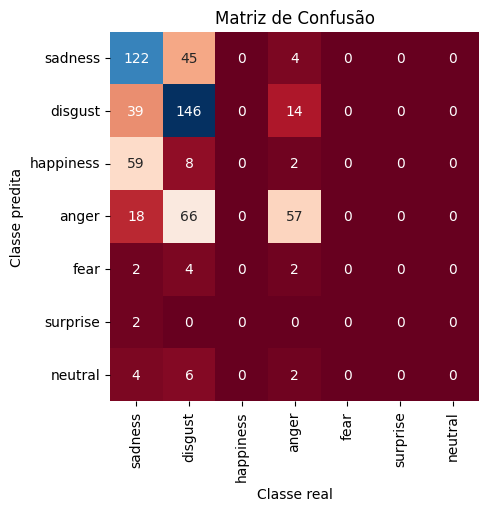

In [325]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo os rótulos únicos de sentimento para configurar os eixos da matriz de confusão
sentiment_labels = comentarios['sentiment'].unique()

# Calculando a matriz de confusão
# y_test_sentiment: Rótulos reais dos dados de teste para o sentimento
# predicoes_sentiment: Rótulos previstos pelo classificador para o sentimento
# labels: Rótulos das classes para garantir que a matriz de confusão tenha as mesmas ordens de classes
cm = confusion_matrix(y_test_sentiment, predicoes_sentiment, labels=sentiment_labels)

# Criando um gráfico da matriz de confusão usando seaborn
# annot=True: Adiciona anotações com os valores das células
# fmt='d': Formata os valores das anotações como inteiros
# cmap='RdBu': Define o mapa de cores para o gráfico
# cbar=False: Remove a barra de cores
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False, 
            xticklabels=sentiment_labels,
            yticklabels=sentiment_labels)

plt.xlabel("Classe real")    # Rótulo do eixo x
plt.ylabel("Classe predita") # Rótulo do eixo y
plt.title("Matriz de Confusão") # Título do gráfico
plt.show() # Exibindo o gráfico

In [326]:
from sklearn.metrics import classification_report

# Avaliando o desempenho do classificador para a previsão da polaridade
# y_test_polarity: Rótulos reais dos dados de teste para a polaridade do sentimento
# predicoes_polarity: Rótulos previstos pelo classificador para a polaridade do sentimento
print("\nAvaliação para 'polarity':")
print(classification_report(y_test_polarity, predicoes_polarity))


Avaliação para 'polarity':
              precision    recall  f1-score   support

    negative       0.75      0.97      0.85       348
     neutral       0.00      0.00      0.00        12
    positive       0.92      0.59      0.72       242

    accuracy                           0.80       602
   macro avg       0.56      0.52      0.52       602
weighted avg       0.81      0.80      0.78       602



c:\Users\dougl\OneDrive\Desktop\Mineracao_Textos\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\Mineracao_Textos\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\Mineracao_Textos\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

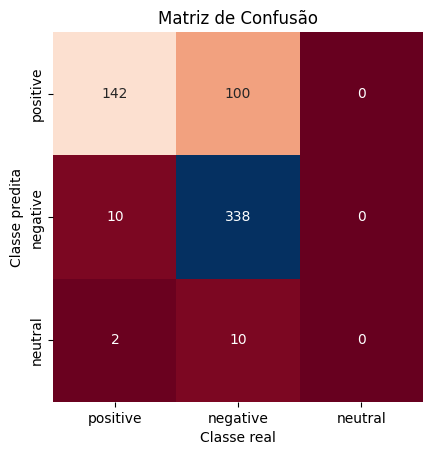

In [327]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo os rótulos únicos de polaridade para configurar os eixos da matriz de confusão
sentiment_labels_pol = comentarios['sentiment_polarity'].unique()

# Calculando a matriz de confusão
# y_test_polarity: Rótulos reais dos dados de teste para a polaridade do sentimento
# predicoes_polarity: Rótulos previstos pelo classificador para a polaridade do sentimento
# labels: Rótulos das classes para garantir que a matriz de confusão tenha as mesmas ordens de classes
cm = confusion_matrix(y_test_polarity, predicoes_polarity, labels=sentiment_labels_pol)

# Criando um gráfico da matriz de confusão usando seaborn
# annot=True: Adiciona anotações com os valores das células
# fmt='d': Formata os valores das anotações como inteiros
# cmap='RdBu': Define o mapa de cores para o gráfico
# cbar=False: Remove a barra de cores
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False, 
            xticklabels=sentiment_labels_pol,
            yticklabels=sentiment_labels_pol)

plt.xlabel("Classe real")    # Rótulo do eixo x
plt.ylabel("Classe predita") # Rótulo do eixo y
plt.title("Matriz de Confusão") # Título do gráfico
plt.show() # Exibindo o gráfico